<a href="https://colab.research.google.com/github/shake345/Python100knock/blob/main/3%E7%AB%A0_%E5%8A%A0%E5%B7%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
project = '100knock-process-visualization'
chapter = 3
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# ３章 時系列データの加工・可視化１０本ノック

## ノック４１：時系列データを読み込んでみよう

In [3]:
from glob import glob
# files: 人数カウントデータ（1秒単位）（地下）
files = glob('data/person_count_1sec/out_0001/*.csv')
files.sort()
files[:5]

['data/person_count_1sec/out_0001/person_count_out_0001_2021011509.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011510.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011511.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011512.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011513.csv']

In [4]:
import pandas as pd
data = pd.read_csv(files[0])
display(data.head(5))
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id               int64
place            int64
receive_time    object
sensor_num       int64
in1              int64
out1             int64
state1           int64
in2              int64
out2             int64
state2           int64
dtype: object


In [5]:
data['receive_time'] = pd.to_datetime(data['receive_time'], format='mixed')
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


In [6]:
data = pd.read_csv(files[0], parse_dates=['receive_time'])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id               int64
place            int64
receive_time    object
sensor_num       int64
in1              int64
out1             int64
state1           int64
in2              int64
out2             int64
state2           int64
dtype: object


In [7]:
data = []
for f in files:
  tmp = pd.read_csv(f)
  tmp['receive_time'] = pd.to_datetime(tmp['receive_time'],format='mixed')
  data.append(tmp)
data = pd.concat(data,ignore_index=True)
display(data.head())
len(data)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


2346162

## ノック４２：日付の範囲を確認しよう

In [8]:
min_receive_time = data['receive_time'].min()
max_receive_time = data['receive_time'].max()
print(min_receive_time)
print(max_receive_time)

2021-01-15 09:00:00.144000
2021-02-14 17:59:59.956000


In [9]:
print(data['receive_time'].max()-data['receive_time'].min())
print(max_receive_time - min_receive_time)

30 days 08:59:59.812000
30 days 08:59:59.812000


## ノック４３：日毎のデータ件数を確認しよう

In [10]:
data['receive_date'] = data['receive_time'].dt.date
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15


In [11]:
daily_count = data[['receive_date','id']].groupby('receive_date', as_index=False).count()
daily_count.head()

,receive_date,id
0,2021-01-15,50166
1,2021-01-16,75699
2,2021-01-17,73198
3,2021-01-18,78365
4,2021-01-19,78348


<Axes: xlabel='receive_date', ylabel='id'>

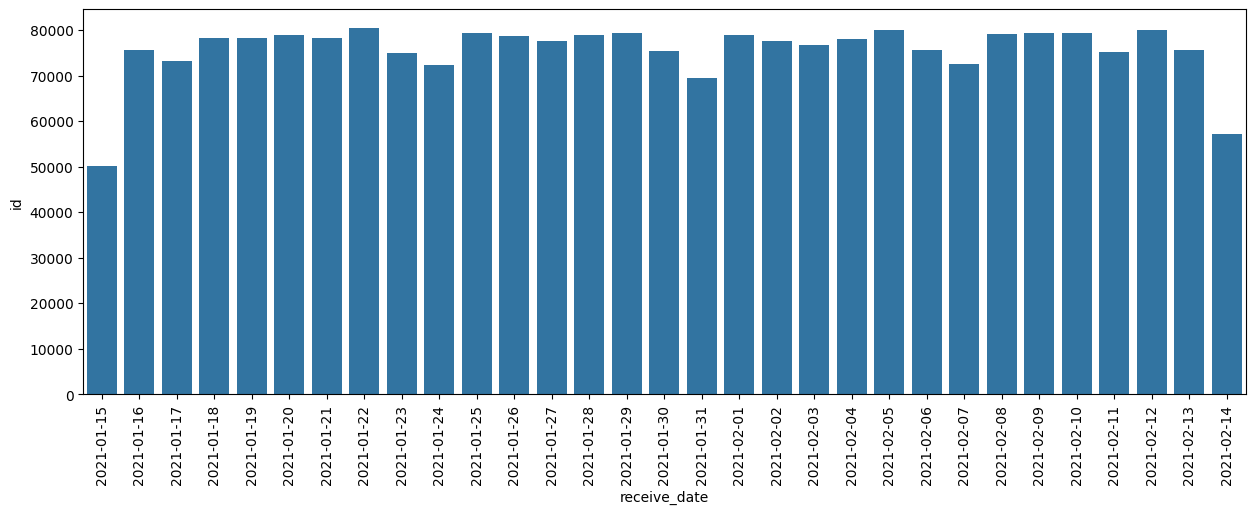

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x=daily_count['receive_date'], y=daily_count['id'])

## ノック４４：日付から曜日を算出しよう

In [13]:
data['dayofweek'] = data['receive_time'].dt.dayofweek
data['day_name'] = data['receive_time'].dt.day_name()
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15,4,Friday
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15,4,Friday
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15,4,Friday
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15,4,Friday
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15,4,Friday


In [14]:
data[['receive_date','dayofweek','day_name']].drop_duplicates(subset='receive_date').head(10)

,receive_date,dayofweek,day_name
0,2021-01-15,4,Friday
50166,2021-01-16,5,Saturday
125865,2021-01-17,6,Sunday
199063,2021-01-18,0,Monday
277428,2021-01-19,1,Tuesday
355776,2021-01-20,2,Wednesday
434668,2021-01-21,3,Thursday
513010,2021-01-22,4,Friday
593585,2021-01-23,5,Saturday
668686,2021-01-24,6,Sunday


## ノック４５：特定範囲のデータに絞り込もう

In [15]:
import datetime as dt
data_extract = data.loc[(data['receive_time']>=dt.datetime(2021,1,20))&(data['receive_time']<dt.datetime(2021,1,23))].copy()
display(data_extract.head())
display(data_extract.tail())

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday


,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593584,2624,1,2021-01-22 23:58:36.927,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday


## ノック４６：秒単位のデータを作成しよう

In [17]:
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.round('s') # 四捨五入
data_extract.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:42
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


In [18]:
print(len(data_extract))
print(len(data_extract['receive_time_sec'].unique()))

237809
237807


In [19]:
data_extract[data_extract['receive_time_sec'].duplicated(keep=False)].head() # keep=False: 重複しているものは最初も最後も関係なくすべて重複とみなす

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578874,887,1,2021-01-22 19:15:06.530,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08
578877,890,1,2021-01-22 19:15:08.424,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08


In [20]:
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.floor('s') # 切り捨て
display(data_extract.head())
print(len(data_extract))
print(len(data_extract['receive_time_sec'].unique()))

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:40
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


237809
237808


In [21]:
data_extract[data_extract['receive_time_sec'].duplicated(keep=False)].head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07


In [22]:
data_extract = data_extract.drop_duplicates(subset=['receive_time_sec'])
min_receive_time = data_extract['receive_time_sec'].min()
max_receive_time = data_extract['receive_time_sec'].max()
print(len(data_extract))
print(f'{min_receive_time}から{max_receive_time}')

237808
2021-01-20 00:00:40から2021-01-22 23:58:36


## ノック４７：秒単位のデータを整形しよう

## ノック４８：秒間の欠損データを処理しよう

## ノック４９：通った人数を可視化しよう

## ノック５０：移動平均を計算して可視化しよう